In [55]:
import nltk

In [56]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Celestial\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Celestial\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Celestial\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Celestial\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Celestial\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [57]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
document = 'Text analysis is the process of extracting meaningful insights from textual data. It involves techniques like tokenization, stemming and lemmatization.'

In [59]:
tokens = word_tokenize(document)
print('Tokens: ', tokens)

Tokens:  ['Text', 'analysis', 'is', 'the', 'process', 'of', 'extracting', 'meaningful', 'insights', 'from', 'textual', 'data', '.', 'It', 'involves', 'techniques', 'like', 'tokenization', ',', 'stemming', 'and', 'lemmatization', '.']


In [60]:
pos_tags = pos_tag(tokens)
print(pos_tags)

[('Text', 'JJ'), ('analysis', 'NN'), ('is', 'VBZ'), ('the', 'DT'), ('process', 'NN'), ('of', 'IN'), ('extracting', 'VBG'), ('meaningful', 'JJ'), ('insights', 'NNS'), ('from', 'IN'), ('textual', 'JJ'), ('data', 'NNS'), ('.', '.'), ('It', 'PRP'), ('involves', 'VBZ'), ('techniques', 'NNS'), ('like', 'IN'), ('tokenization', 'NN'), (',', ','), ('stemming', 'VBG'), ('and', 'CC'), ('lemmatization', 'NN'), ('.', '.')]


In [61]:
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
print('After stop words removal: ', filtered_words)

After stop words removal:  ['Text', 'analysis', 'process', 'extracting', 'meaningful', 'insights', 'textual', 'data', '.', 'involves', 'techniques', 'like', 'tokenization', ',', 'stemming', 'lemmatization', '.']


In [62]:
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
print('Stemmed Tokens', stemmed_tokens)

Stemmed Tokens ['text', 'analysi', 'process', 'extract', 'meaning', 'insight', 'textual', 'data', '.', 'involv', 'techniqu', 'like', 'token', ',', 'stem', 'lemmat', '.']


In [63]:
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]
print(lemmatized_tokens)

['text', 'analysi', 'process', 'extract', 'meaning', 'insight', 'textual', 'data', '.', 'involv', 'techniqu', 'like', 'token', ',', 'stem', 'lemmat', '.']


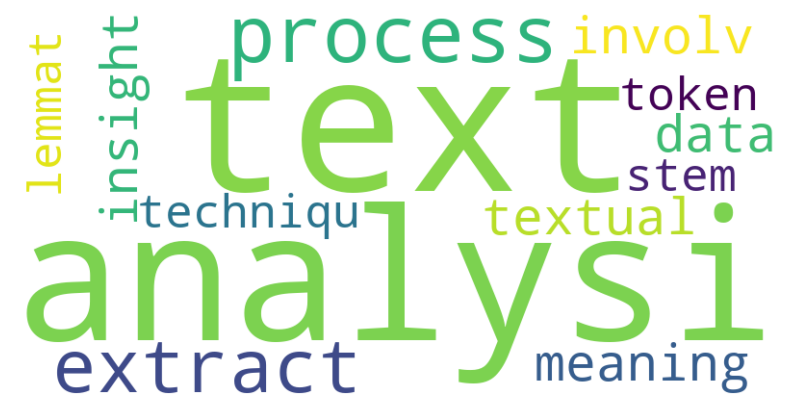

In [64]:
text = " ".join(lemmatized_tokens)
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [65]:
documents = [
    'Text analysis is the process of extracting meaningful insights from textual data.',
    'It involves techniques like tokenization, stemming and lemmatization.',
    'It provides summary or extract of the text.'
]

In [66]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)
feature_names = vectorizer.get_feature_names_out()

print('TF IDF matrix:')
print(tfidf_matrix.toarray())
print('Terms:', feature_names)

TF IDF matrix:
[[0.30520733 0.         0.30520733 0.         0.30520733 0.30520733
  0.30520733 0.         0.30520733 0.         0.         0.
  0.30520733 0.23211804 0.         0.30520733 0.         0.
  0.         0.         0.23211804 0.30520733 0.23211804 0.        ]
 [0.         0.36325471 0.         0.         0.         0.
  0.         0.36325471 0.         0.27626457 0.36325471 0.36325471
  0.         0.         0.         0.         0.         0.36325471
  0.         0.36325471 0.         0.         0.         0.36325471]
 [0.         0.         0.         0.39798027 0.         0.
  0.         0.         0.         0.30267425 0.         0.
  0.         0.30267425 0.39798027 0.         0.39798027 0.
  0.39798027 0.         0.30267425 0.         0.30267425 0.        ]]
Terms: ['analysis' 'and' 'data' 'extract' 'extracting' 'from' 'insights'
 'involves' 'is' 'it' 'lemmatization' 'like' 'meaningful' 'of' 'or'
 'process' 'provides' 'stemming' 'summary' 'techniques' 'text' 'textual'